In [2]:
import pandas as pd

df = pd.read_excel("D:/StudySpace/Nam3_KyHe/DSinPython/dataset/phone_data_with_vectors.xlsx")

# Separate the data into features and labels
X = df.drop(['corrected_comment', 'sentiment'], axis=1)
y = df['sentiment']

# preview the data
print(X.head(5))

      dim_0     dim_1     dim_2     dim_3     dim_4     dim_5     dim_6  \
0  0.174561  0.542601  0.255215  0.541692  0.101229  0.138815 -0.539414   
1  0.503307 -0.265437  0.242617 -0.353634  0.035149  0.334169 -0.552736   
2  0.259807 -0.431232  0.169415  0.272264 -0.041970  0.314124 -0.624072   
3  0.176232 -0.254660  0.288673  0.151017 -0.187072  0.322322  0.003604   
4  0.421829 -0.202997  0.162181 -0.202360  0.110988  0.327640  0.423022   

      dim_7     dim_8     dim_9  ...   dim_758   dim_759   dim_760   dim_761  \
0 -0.123278 -0.406436  0.525978  ...  0.238039  0.462933  0.029111  0.247002   
1 -0.381832 -0.587915  0.156950  ...  0.123852  0.262470  0.962394  0.470150   
2 -0.655931 -0.157113 -0.166144  ...  0.033778  0.239958  0.687811  0.490743   
3 -0.404170 -0.452193 -0.182708  ... -0.213105  0.167334  0.600029  0.490144   
4  0.109973 -0.566493 -0.024909  ...  0.401917  0.423236 -0.393902  0.084860   

    dim_762   dim_763   dim_764   dim_765   dim_766   dim_767  
0 -0

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.svm import SVC

# Create SVM model with linear kernel
model = SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy:  0.8824701195219123
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       470
           1       0.91      0.92      0.92      1036

    accuracy                           0.88      1506
   macro avg       0.86      0.86      0.86      1506
weighted avg       0.88      0.88      0.88      1506



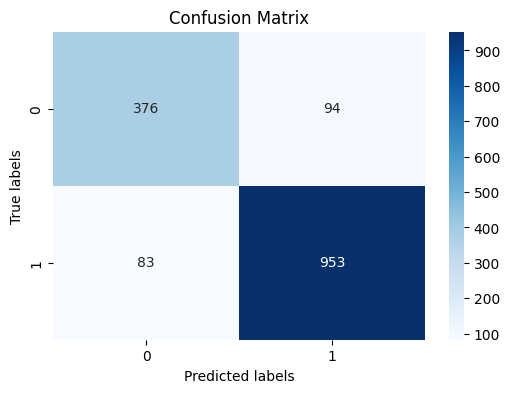

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [32]:
from sentence_transformers import SentenceTransformer
from pyvi.ViTokenizer import tokenize

embedding_model = SentenceTransformer('dangvantuan/vietnamese-embedding')

max_lenght = 512
def predict_sentiment(new_comment, model, embedding_model, max_length):
    """Predicts the sentiment of a Vietnamese phone comment.
    Args:
        new_comment (str): The Vietnamese phone comment to predict.
        model: The trained Logistic Regression model.
        embedding_model: The SentenceTransformer model for Vietnamese embeddings. (dangvantuan/vietnamese-embedding on Hugging Face)
        max_length: Maximum sequence length for the embedding model.
    Returns:
        int: The predicted sentiment (0 for negative, 1 for positive).
    """
    try:
        # Tokenize the comment
        tokenized_comment = tokenize(new_comment)
        tokenized_comment = tokenized_comment[:max_length]

        # Generate the embedding
        embedding = embedding_model.encode(tokenized_comment)

        # Create DataFrame with correct column names (dim_0 ... dim_767)
        embedding_df = pd.DataFrame([embedding], columns=[f'dim_{i}' for i in range(len(embedding))])

        # Make the prediction
        prediction = model.predict(embedding_df)
        return prediction[0] #[0] to get the value from the numpy array
    except Exception as e:
        print(f"Error processing comment: {new_comment}")
        print(e)
        return -1  # Return -1 to indicate an error

# Test with new comments
comments = [
    "Điện thoại này rất tốt, tôi rất hài lòng!",
    "Sản phẩm này quá tệ, tôi rất thất vọng.",
    "Máy chạy mượt, camera đẹp.",
    "Chan pin nay qua te, toi rat that vong.",
    "Sản phẩm không đáng giá, tôi không hài lòng.",
    "Máy dùng được tí đã lag, mọi người đừng mua.",
    "Dùng tốt, nên mua.",
    "10",
    "1!!",
    "...",
    "<3",
    "<3 <3 <3",
    "tôi yêu em",
    "iphone dễ vỡ",
    "mua khóa học chỉ với 10$/tháng. Nhanh tay đăng ký ngay! https://example.com",
    "Đáng báo động: Tình hình dịch bệnh diễn biến phức tạp. Hãy ở nhà và giữ sức khỏe!",
    "đi chơi không",
    "báo động",
    "đỏ",
]

for comment in comments:
    sentiment = predict_sentiment(comment, model, embedding_model, max_lenght)
    if sentiment == 1:
        print(f"'{comment}' --> (1) Positive")
    elif sentiment == 0:
        print(f"'{comment}' --> (0) Negative")
    else:
        print(f"Error processing '{comment}'")

d:\StudySpace\Nam3_KyHe\DSinPython\crawler\new_selenium_env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


'Điện thoại này rất tốt, tôi rất hài lòng!' --> (1) Positive
'Sản phẩm này quá tệ, tôi rất thất vọng.' --> (0) Negative
'Máy chạy mượt, camera đẹp.' --> (1) Positive
'Chan pin nay qua te, toi rat that vong.' --> (0) Negative
'Sản phẩm không đáng giá, tôi không hài lòng.' --> (0) Negative
'Máy dùng được tí đã lag, mọi người đừng mua.' --> (0) Negative
'Dùng tốt, nên mua.' --> (1) Positive
'10' --> (1) Positive
'1!!' --> (1) Positive
'...' --> (1) Positive
'<3' --> (0) Negative
'<3 <3 <3' --> (1) Positive
'tôi yêu em' --> (1) Positive
'iphone dễ vỡ' --> (0) Negative
'mua khóa học chỉ với 10$/tháng. Nhanh tay đăng ký ngay! https://example.com' --> (0) Negative
'Đáng báo động: Tình hình dịch bệnh diễn biến phức tạp. Hãy ở nhà và giữ sức khỏe!' --> (0) Negative
'đi chơi không' --> (1) Positive
'báo động' --> (1) Positive
'đỏ' --> (1) Positive
